<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Var" data-toc-modified-id="Var-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Var</a></span></li><li><span><a href="#Init" data-toc-modified-id="Init-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Init</a></span></li><li><span><a href="#Bracken" data-toc-modified-id="Bracken-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Bracken</a></span><ul class="toc-item"><li><span><a href="#Unclassified" data-toc-modified-id="Unclassified-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Unclassified</a></span><ul class="toc-item"><li><span><a href="#Filtered" data-toc-modified-id="Filtered-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Filtered</a></span></li></ul></li><li><span><a href="#Classified-reads" data-toc-modified-id="Classified-reads-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Classified reads</a></span><ul class="toc-item"><li><span><a href="#Only-in-metadata" data-toc-modified-id="Only-in-metadata-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Only in metadata</a></span></li><li><span><a href="#Phylum" data-toc-modified-id="Phylum-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Phylum</a></span></li><li><span><a href="#Filtered" data-toc-modified-id="Filtered-4.2.3"><span class="toc-item-num">4.2.3&nbsp;&nbsp;</span>Filtered</a></span></li></ul></li></ul></li><li><span><a href="#sessionInfo" data-toc-modified-id="sessionInfo-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>sessionInfo</a></span></li></ul></div>

# Goal

* Summarize bracken output for all datasets

# Var

In [1]:
# working dir
work_dir = '/ebio/abt3_projects/databases_no-backup/curatedMetagenomicData/global_metagenomes/diversity/'
metadata_filt_file = file.path(work_dir, 'CurMetDat_metadata_filt-n1846.tsv')

# metagenome profiling 
profile_dir = '/ebio/abt3_projects/databases_no-backup/curatedMetagenomicData/global_metagenomes/LLMGP/'

# associated files
base_in_dir = '/ebio/abt3_projects/small_projects/nyoungblut/public_data_retireval/'
metadata_file = file.path(base_in_dir, 'CurMetDat-metagenomes', 'files', 'metadata', 'Filtered_CurMetDat_f.tsv')
sample_file_dir = file.path(base_in_dir, 'CurMetDat-metagenomes', 'files', 'sample_files')

# params
threads = 16

# Init

In [2]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(data.table)
library(dtplyr)
library(tidytable)
library(LeyLabRMisc)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last



Attaching package: ‘tidytable’


The following object is masked from ‘package:stats’:

    dt




In [3]:
df.dims()
setDTthreads(threads)

# Bracken

In [4]:
# full metadata
meta = Fread(metadata_file)
meta %>% unique_n('Samples', Sample)
meta

No. of unique Samples: 3594 


dataset_name,Sample,subjectID,body_site,antibiotics_current_use,study_condition,disease,age,age_category,gender,⋯,il_1,glp_1,travel_destination,urea_nitrogen,disease_stage,uncurated_metadata,family_member,subject_n,samp_n,westernized
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,⋯,<dbl>,<dbl>,<chr>,<dbl>,<int>,<chr>,<chr>,<int>,<int>,<lgl>
AsnicarF_2017,MV_FEM1_t1Q14,MV_FEM1,stool,NA,control,healthy,NA,adult,female,⋯,NA,NA,NA,NA,NA,NA,NA,1,1,TRUE
AsnicarF_2017,MV_FEM2_t1Q14,MV_FEM2,stool,NA,control,healthy,NA,adult,female,⋯,NA,NA,NA,NA,NA,NA,NA,1,1,TRUE
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
ZellerG_2014,CCIS82944710ST-20-0,FR-730,stool,NA,control,healthy,38,adult,female,⋯,NA,NA,NA,NA,NA,NA,NA,1,1,TRUE
ZellerG_2014,CCIS93040568ST-20-0,FR-682,stool,NA,control,healthy,65,adult,male,⋯,NA,NA,NA,NA,NA,NA,NA,1,1,TRUE


In [5]:
# filtered metadata
meta_f = Fread(metadata_filt_file)
meta_f %>% unique_n('Samples', Sample)
meta_f

No. of unique Samples: 1846 


dataset,Sample,Run,Lane,Remote,subjectID,body_site,antibiotics_current_use,study_condition,disease,⋯,il_1,glp_1,travel_destination,urea_nitrogen,disease_stage,uncurated_metadata,family_member,subject_n,samp_n,westernized
<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<chr>,<dbl>,<lgl>,<chr>,<lgl>,<int>,<int>,<lgl>
Bengtsson-PalmeJ_2015,TRAVELRES1,1,1,ERR636349,TRAVELRES1_2,stool,no,control,healthy,⋯,NA,NA,NA,NA,NA,NA,NA,1,1,TRUE
Bengtsson-PalmeJ_2015,TRAVELRES10,1,1,ERR636358,TRAVELRES9_10,stool,no,control,healthy,⋯,NA,NA,LKA,NA,NA,NA,NA,1,1,TRUE
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
YeZ_2018,YEZ_N-38,1,1,SRR8675918,YEZ_N-38,stool,no,control,healthy,⋯,NA,NA,NA,NA,NA,NA,NA,1,1,TRUE
YeZ_2018,YEZ_N-37,1,1,SRR8675921,YEZ_N-37,stool,no,control,healthy,⋯,NA,NA,NA,NA,NA,NA,NA,1,1,TRUE


In [6]:
# checking key overlap
overlap(meta, meta_f, Sample, Sample)

intersect(x,y): 1846 
setdiff(x,y): 1748 
setdiff(y,x): 0 
union(x,y): 3594 


## Unclassified

In [7]:
# listing files
brk_uncls_files = list_files(profile_dir, 'all-combined_kraken-unclassified.tsv')
brk_uncls_files = brk_uncls_files[!grepl('(34_HuBif|36_EcoEvo)', brk_uncls_files)]
brk_uncls_files %>% length
brk_uncls_files %>% head(n=3)

[1] 33

[1] "/ebio/abt3_projects/databases_no-backup/curatedMetagenomicData/global_metagenomes/LLMGP//01_CosteaPI_2017/kraken/all-combined_kraken-unclassified.tsv"      
[2] "/ebio/abt3_projects/databases_no-backup/curatedMetagenomicData/global_metagenomes/LLMGP//02_Obregon-TitoAJ_2015/kraken/all-combined_kraken-unclassified.tsv"
[3] "/ebio/abt3_projects/databases_no-backup/curatedMetagenomicData/global_metagenomes/LLMGP//03_PasolliE_2018/kraken/all-combined_kraken-unclassified.tsv"

In [8]:
# reading in tables
brk_uncls = brk_uncls_files %>%
    files_to_list(-2) %>%
    plyr::llply(Fread) %>%
    data.table::rbindlist(use.names=TRUE, idcol='Dataset') %>%
    dt_mutate(Dataset = gsub('^[0-9]+_', '', Dataset))

brk_uncls  %>% unique_n('Samples', sample)
brk_uncls

No. of unique Samples: 3360 


Dataset,sample,percent_reads,num_reads_mapped_to_clade,num_reads_mapped_to_taxon,rank_code,taxID,scientific_name
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<int>,<chr>
CosteaPI_2017,halbarad-11-0-0,18.60,185981,185981,U,0,unclassified
CosteaPI_2017,scavenger-11-60-0,10.99,109942,109942,U,0,unclassified
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
YuJ_2015,SZAXPI017591-140,28.00,279999,279999,U,0,unclassified
YuJ_2015,SZAXPI017592-142,21.41,214099,214099,U,0,unclassified


In [9]:
# checking key overlap
overlap(brk_uncls, meta, sample, Sample)
cat('---\n')
overlap(brk_uncls, meta, Dataset, dataset_name)

intersect(x,y): 3360 
setdiff(x,y): 0 
setdiff(y,x): 234 
union(x,y): 3594 
---
intersect(x,y): 33 
setdiff(x,y): 0 
setdiff(y,x): 4 
union(x,y): 37 


In [10]:
# joining with metadata
brk_uncls = brk_uncls %>%
    dt_inner_join(meta %>% dt_rename('sample' = Sample, 'Dataset' = dataset_name), 
                  by=c('sample', 'Dataset')) 

brk_uncls

Dataset,sample,percent_reads,num_reads_mapped_to_clade,num_reads_mapped_to_taxon,rank_code,taxID,scientific_name,subjectID,body_site,⋯,il_1,glp_1,travel_destination,urea_nitrogen,disease_stage,uncurated_metadata,family_member,subject_n,samp_n,westernized
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<chr>,<dbl>,<int>,<chr>,<chr>,<int>,<int>,<lgl>
AsnicarF_2017,MV_FEM1_t1Q14,16.14,161357,161357,U,0,unclassified,MV_FEM1,stool,⋯,NA,NA,NA,NA,NA,NA,NA,1,1,TRUE
AsnicarF_2017,MV_FEM2_t1Q14,24.81,248051,248051,U,0,unclassified,MV_FEM2,stool,⋯,NA,NA,NA,NA,NA,NA,NA,1,1,TRUE
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
ZeeviD_2015,PNP_Validation_45,19.22,192152,192152,U,0,unclassified,PNP_Validation_45,stool,⋯,NA,NA,NA,NA,NA,NA,NA,1,1,TRUE
ZeeviD_2015,PNP_Validation_46,17.94,179448,179448,U,0,unclassified,PNP_Validation_46,stool,⋯,NA,NA,NA,NA,NA,NA,NA,1,1,TRUE


In [12]:
# summarizing
brk_uncls_s = brk_uncls %>%
    dt_mutate(perc_reads_cls = 100 - percent_reads) %>%
    dt_mutate(median_perc_reads_cls = median(perc_reads_cls), 
              by=c(Dataset)) %>%
    dt_mutate(Dataset = Dataset %>% reorder(-median_perc_reads_cls)) 

brk_uncls_s

Dataset,sample,percent_reads,num_reads_mapped_to_clade,num_reads_mapped_to_taxon,rank_code,taxID,scientific_name,subjectID,body_site,⋯,travel_destination,urea_nitrogen,disease_stage,uncurated_metadata,family_member,subject_n,samp_n,westernized,perc_reads_cls,median_perc_reads_cls
<fct>,<chr>,<dbl>,<int>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,⋯,<chr>,<dbl>,<int>,<chr>,<chr>,<int>,<int>,<lgl>,<dbl>,<dbl>
AsnicarF_2017,MV_FEM1_t1Q14,16.14,161357,161357,U,0,unclassified,MV_FEM1,stool,⋯,NA,NA,NA,NA,NA,1,1,TRUE,83.86,80.875
AsnicarF_2017,MV_FEM2_t1Q14,24.81,248051,248051,U,0,unclassified,MV_FEM2,stool,⋯,NA,NA,NA,NA,NA,1,1,TRUE,75.19,80.875
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
ZeeviD_2015,PNP_Validation_45,19.22,192152,192152,U,0,unclassified,PNP_Validation_45,stool,⋯,NA,NA,NA,NA,NA,1,1,TRUE,80.78,78.6
ZeeviD_2015,PNP_Validation_46,17.94,179448,179448,U,0,unclassified,PNP_Validation_46,stool,⋯,NA,NA,NA,NA,NA,1,1,TRUE,82.06,78.6


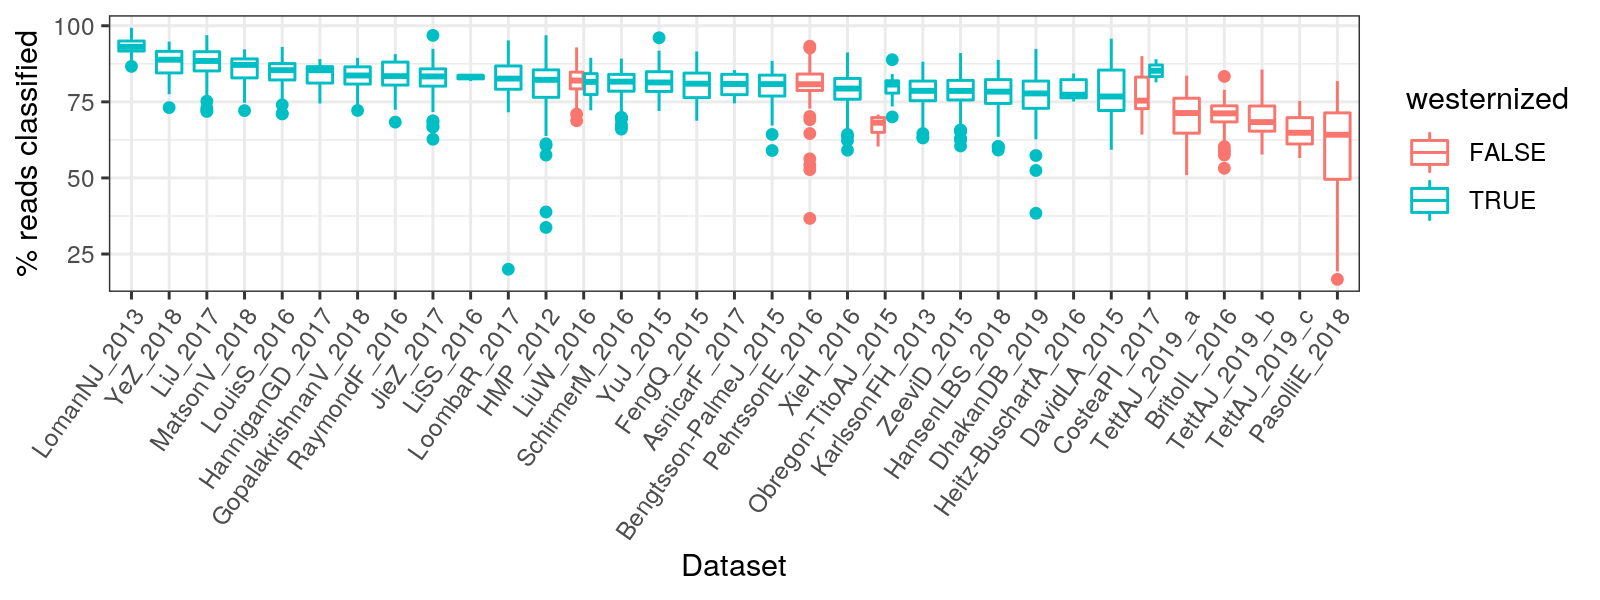

In [13]:
p = brk_uncls_s %>%
    ggplot(aes(Dataset, perc_reads_cls, color=westernized)) +
    geom_boxplot() +
    labs(y='% reads classified') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=55, hjust=1)
    )
    
p.dims(8,3)
plot(p)

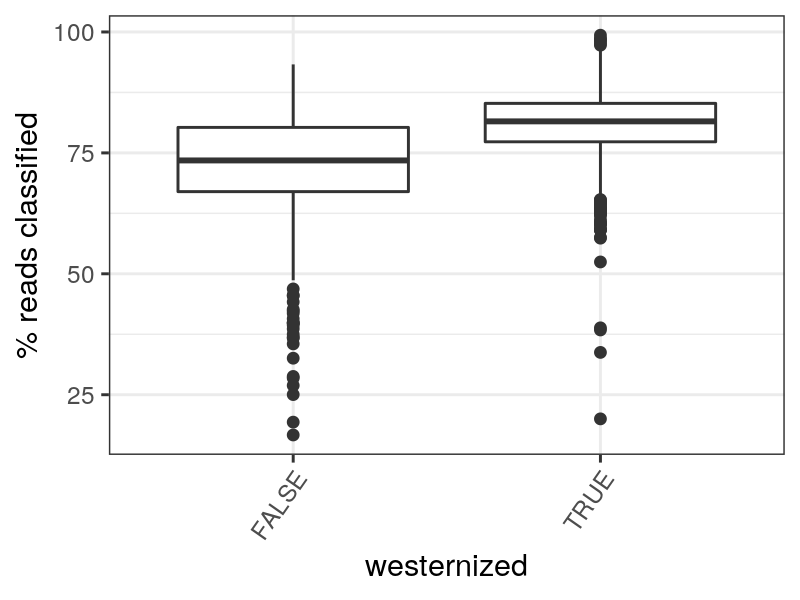

In [14]:
p = brk_uncls_s %>%
    ggplot(aes(westernized, perc_reads_cls)) +
    geom_boxplot() +
    labs(y='% reads classified') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=55, hjust=1)
    )
    
p.dims(4,3)
plot(p)

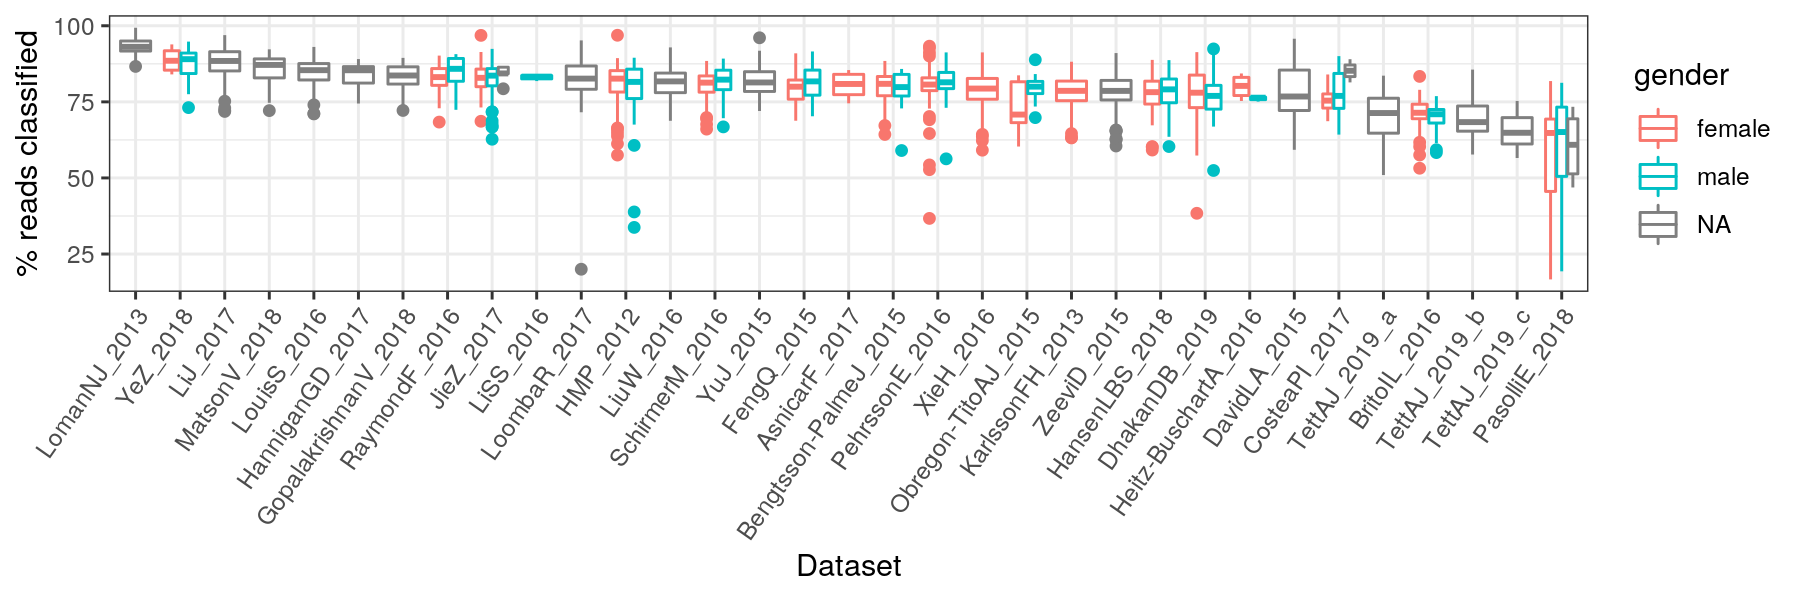

In [15]:
p = brk_uncls_s %>%
    ggplot(aes(Dataset, perc_reads_cls, color=gender)) +
    geom_boxplot() +
    labs(y='% reads classified') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=55, hjust=1)
    )
    
p.dims(9,3)
plot(p)

Warning message:
“Removed 1431 rows containing missing values (geom_point).”


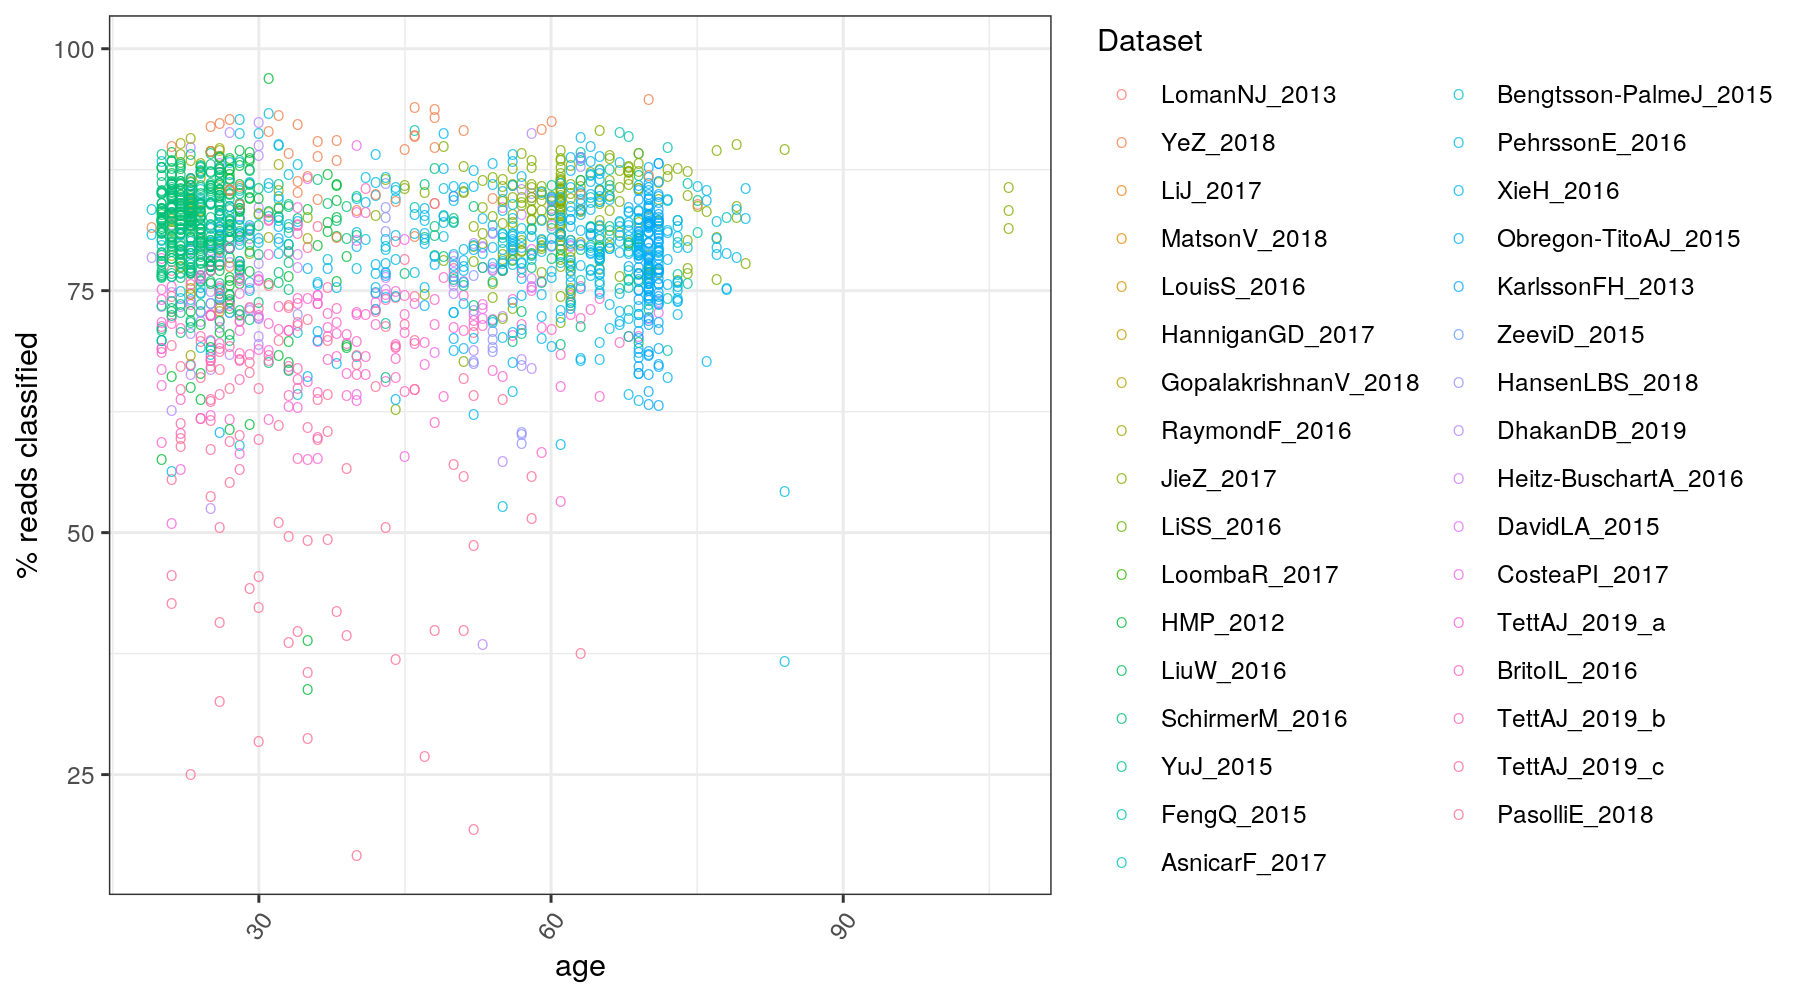

In [16]:
p = brk_uncls_s %>%
    ggplot(aes(age, perc_reads_cls, color=Dataset)) +
    geom_point(shape='O', alpha=0.8) +
    labs(y='% reads classified') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=55, hjust=1)
    )
    
p.dims(9,5)
plot(p)

### Filtered

* Just samples with "good" metadata

In [17]:
# checking key ovlerap
overlap(brk_uncls, meta_f, sample, Sample)

intersect(x,y): 1843 
setdiff(x,y): 1517 
setdiff(y,x): 3 
union(x,y): 3363 


In [18]:
brk_uncls_f = brk_uncls %>%
    dt_inner_join(meta_f %>% dt_rename('sample'=Sample, 'Dataset'=dataset),
                  by=c('sample', 'Dataset'))
brk_uncls_f

Dataset,sample,percent_reads,num_reads_mapped_to_clade,num_reads_mapped_to_taxon,rank_code,taxID,scientific_name,subjectID,body_site,⋯,i.il_1,i.glp_1,i.travel_destination,i.urea_nitrogen,i.disease_stage,i.uncurated_metadata,i.family_member,i.subject_n,i.samp_n,i.westernized
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<chr>,<dbl>,<lgl>,<chr>,<lgl>,<int>,<int>,<lgl>
Bengtsson-PalmeJ_2015,TRAVELRES1,31.23,312348,312348,U,0,unclassified,TRAVELRES1_2,stool,⋯,NA,NA,NA,NA,NA,NA,NA,1,1,TRUE
Bengtsson-PalmeJ_2015,TRAVELRES10,35.71,357144,357144,U,0,unclassified,TRAVELRES9_10,stool,⋯,NA,NA,LKA,NA,NA,NA,NA,1,1,TRUE
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
YeZ_2018,YEZ_N-38,11.51,115065,115065,U,0,unclassified,YEZ_N-38,stool,⋯,NA,NA,NA,NA,NA,NA,NA,1,1,TRUE
YeZ_2018,YEZ_N-37,19.44,194379,194379,U,0,unclassified,YEZ_N-37,stool,⋯,NA,NA,NA,NA,NA,NA,NA,1,1,TRUE


In [20]:
# summarizing
brk_uncls_f_s = brk_uncls_f %>%
    dt_mutate(perc_reads_cls = 100 - percent_reads) %>%
    dt_mutate(median_perc_reads_cls = median(perc_reads_cls), by=c(Dataset)) %>%
    dt_mutate(Dataset = Dataset %>% reorder(-median_perc_reads_cls)) 

brk_uncls_f_s

Dataset,sample,percent_reads,num_reads_mapped_to_clade,num_reads_mapped_to_taxon,rank_code,taxID,scientific_name,subjectID,body_site,⋯,i.travel_destination,i.urea_nitrogen,i.disease_stage,i.uncurated_metadata,i.family_member,i.subject_n,i.samp_n,i.westernized,perc_reads_cls,median_perc_reads_cls
<fct>,<chr>,<dbl>,<int>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,⋯,<chr>,<dbl>,<lgl>,<chr>,<lgl>,<int>,<int>,<lgl>,<dbl>,<dbl>
Bengtsson-PalmeJ_2015,TRAVELRES1,31.23,312348,312348,U,0,unclassified,TRAVELRES1_2,stool,⋯,NA,NA,NA,NA,NA,1,1,TRUE,68.77,80.84
Bengtsson-PalmeJ_2015,TRAVELRES10,35.71,357144,357144,U,0,unclassified,TRAVELRES9_10,stool,⋯,LKA,NA,NA,NA,NA,1,1,TRUE,64.29,80.84
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
YeZ_2018,YEZ_N-38,11.51,115065,115065,U,0,unclassified,YEZ_N-38,stool,⋯,NA,NA,NA,NA,NA,1,1,TRUE,88.49,88.85
YeZ_2018,YEZ_N-37,19.44,194379,194379,U,0,unclassified,YEZ_N-37,stool,⋯,NA,NA,NA,NA,NA,1,1,TRUE,80.56,88.85


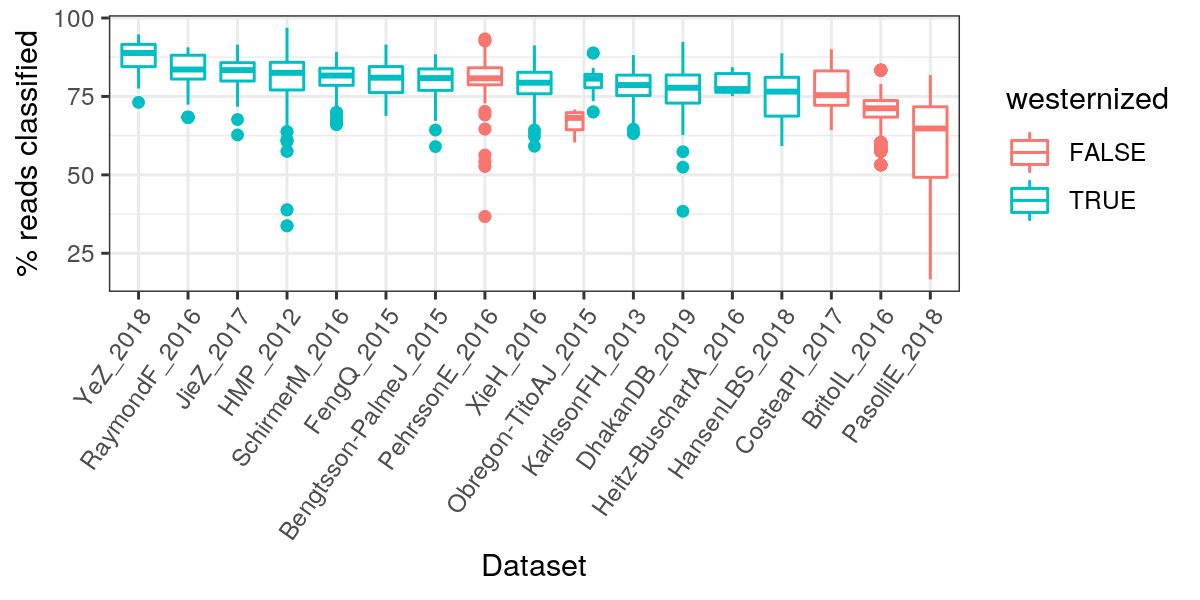

In [21]:
p = brk_uncls_f_s %>%
    ggplot(aes(Dataset, perc_reads_cls, color=westernized)) +
    geom_boxplot() +
    labs(y='% reads classified') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=55, hjust=1)
    )
    
p.dims(6,3)
plot(p)

## Classified reads

* microbial reads

In [22]:
# listing files
brk_cls_files = list_files(profile_dir, 'all-combined-bracken.tsv') 
brk_cls_files = brk_cls_files[!grepl('(34_HuBif|36_EcoEvo)', brk_cls_files)]
brk_cls_files %>% length
brk_cls_files %>% head(n=3)

[1] 33

[1] "/ebio/abt3_projects/databases_no-backup/curatedMetagenomicData/global_metagenomes/LLMGP//01_CosteaPI_2017/kraken/all-combined-bracken.tsv"      
[2] "/ebio/abt3_projects/databases_no-backup/curatedMetagenomicData/global_metagenomes/LLMGP//02_Obregon-TitoAJ_2015/kraken/all-combined-bracken.tsv"
[3] "/ebio/abt3_projects/databases_no-backup/curatedMetagenomicData/global_metagenomes/LLMGP//03_PasolliE_2018/kraken/all-combined-bracken.tsv"

In [23]:
# reading tables
brk_cls = brk_cls_files %>% files_to_list(-2) %>%
    plyr::llply(read_bracken) %>%
    data.table::rbindlist(use.names=TRUE, idcol='dataset')
brk_cls

dataset,name,taxonomy_id,taxonomy_lvl,Domain,Phylum,Class,Order,Family,Genus,Species,Sample,Abundance
<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
01_CosteaPI_2017,s__Caecibacter massiliensis,108259,S,Bacteria,Firmicutes_C,Negativicutes,Veillonellales,Megasphaeraceae,Caecibacter,Caecibacter massiliensis,halbarad.11.0.0,0
01_CosteaPI_2017,s__UBA1777 sp002350825,178550,S,Bacteria,Firmicutes_A,Clostridia,Oscillospirales,Oscillospiraceae,UBA1777,UBA1777 sp002350825,halbarad.11.0.0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
33_YuJ_2015,s__Serratia grimesii,121568,S,Bacteria,Proteobacteria,Gammaproteobacteria,Enterobacterales,Enterobacteriaceae,Serratia,Serratia grimesii,SZAXPI017592.142,0
33_YuJ_2015,s__Bacteroides_A sp002161565,119189,S,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides_A,Bacteroides_A sp002161565,SZAXPI017592.142,0


In [24]:
# number of samples
brk_cls %>% unique_n('Samples', Sample) 

No. of unique Samples: 3360 


In [25]:
# key overlap
overlap(brk_cls, meta, Sample, Sample)

intersect(x,y): 2923 
setdiff(x,y): 437 
setdiff(y,x): 671 
union(x,y): 4031 


In [26]:
# key overlap with metadata samples renamed
overlap(brk_cls, meta %>% dt_pull(Sample) %>% gsub('-', '.', .), Sample)

intersect(x,y): 3360 
setdiff(x,y): 0 
setdiff(y,x): 234 
union(x,y): 3594 


### Only in metadata

In [30]:
# samples in metadata but not in bracken output
meta_only = meta %>%
    mutate.(Sample = gsub('-', '.', Sample)) %>%
    anti_join.(brk_cls, c('Sample'))
meta_only

dataset_name,Sample,subjectID,body_site,antibiotics_current_use,study_condition,disease,age,age_category,gender,⋯,il_1,glp_1,travel_destination,urea_nitrogen,disease_stage,uncurated_metadata,family_member,subject_n,samp_n,westernized
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,⋯,<dbl>,<dbl>,<chr>,<dbl>,<int>,<chr>,<chr>,<int>,<int>,<lgl>
LoombaR_2017,SID0002_gti,loombaSUB_subject-0002,stool,NA,fatty_liver,fatty_liver,NA,adult,NA,⋯,NA,NA,NA,NA,0,NA,NA,1,1,TRUE
LoombaR_2017,SID0004_cle,loombaSUB_subject-0004,stool,NA,fatty_liver,fatty_liver,NA,adult,NA,⋯,NA,NA,NA,NA,0,NA,NA,1,1,TRUE
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
ZellerG_2014,CCIS82944710ST.20.0,FR-730,stool,NA,control,healthy,38,adult,female,⋯,NA,NA,NA,NA,NA,NA,NA,1,1,TRUE
ZellerG_2014,CCIS93040568ST.20.0,FR-682,stool,NA,control,healthy,65,adult,male,⋯,NA,NA,NA,NA,NA,NA,NA,1,1,TRUE


In [32]:
df.dims(10)
meta_only %>%
    summarize.(n = n.(), by=dataset_name)
df.dims()

dataset_name,n
<chr>,<int>
LoombaR_2017,53
PasolliE_2018,3
QinN_2014,114
RampelliS_2015,26
SmitsSA_2017,32
ZellerG_2014,6


### Phylum

,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,sd,sd_err_of_mean
.,0.3039514,0.9259259,1.25,3.35332,3.030303,26.45213,10.147,4.142


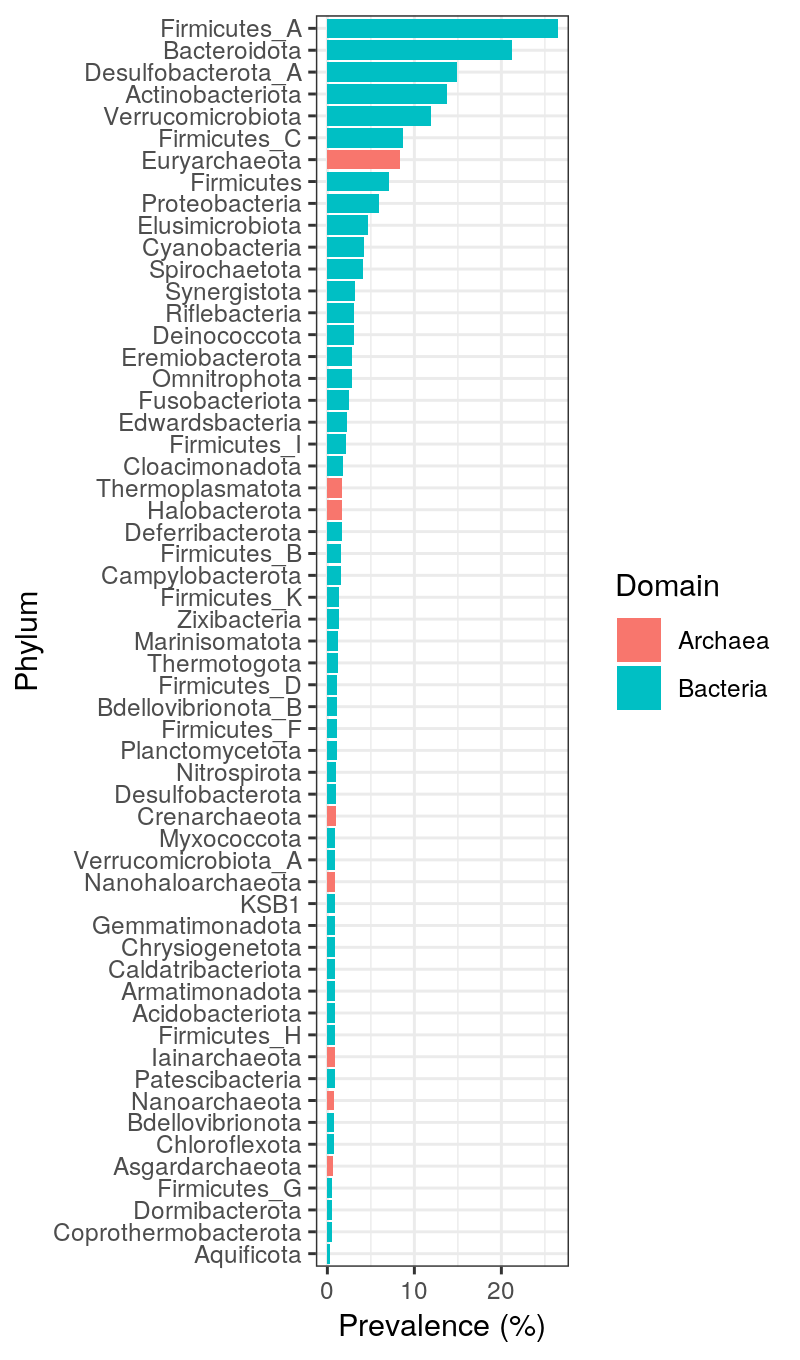

In [38]:
# phylum prevalence
brk_cls_s = brk_cls %>%
    dt_summarize(prev = sum(Abundance > 1e-5) / length(Abundance) * 100,
                 by=list(Domain, Phylum))

brk_cls_s %>% dt_pull(prev) %>% summary_x

p = brk_cls_s %>%
    dt_mutate(Phylum = Phylum %>% reorder(prev)) %>%
    ggplot(aes(Phylum, prev, fill=Domain)) +
    geom_bar(stat='identity') +
    coord_flip() +
    labs(y='Prevalence (%)') +
    theme_bw() 

p.dims(4,6.8)
plot(p)

,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,sd,sd_err_of_mean
.,6.990881e-05,0.000302,0.0005731914,0.009253291,0.005196491,0.117745,0.047,0.019


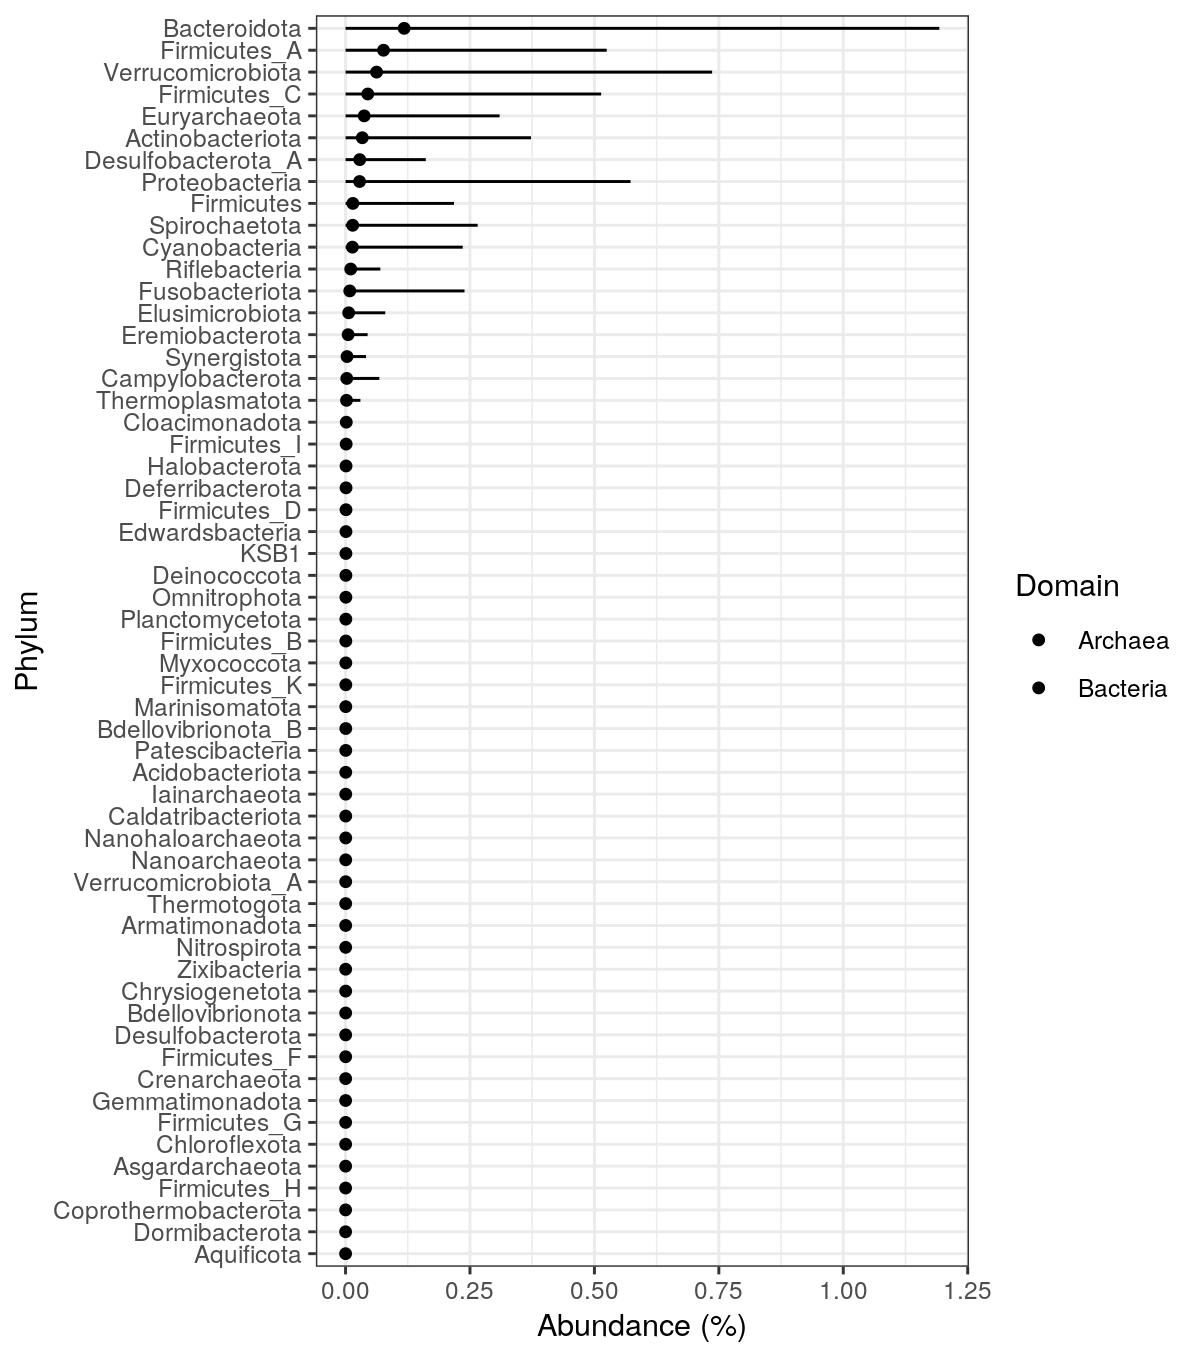

In [39]:
# phylum abundance
brk_cls_s = brk_cls %>%
    dt_mutate(Abundance = Abundance * 100) %>%
    dt_summarize(mean_abund = mean(Abundance),
              sd_abund = sd(Abundance),
              by=list(Domain, Phylum))
brk_cls_s %>% dt_pull(mean_abund) %>% summary_x

p = brk_cls_s %>%
    dt_mutate(Phylum = Phylum %>% reorder(mean_abund)) %>%
    ggplot(aes(Phylum, mean_abund, fill=Domain)) +
    geom_linerange(aes(ymin=ifelse(mean_abund - sd_abund < 0, 0, mean_abund - sd_abund),
                       ymax=mean_abund + sd_abund)) +
    geom_point() +
    coord_flip() +
    labs(y='Abundance (%)') +
    theme_bw() 

p.dims(6,6.8)
plot(p)

### Filtered

In [41]:
brk_cls_j = brk_cls %>%
    dt_select(-taxonomy_id, -taxonomy_lvl) %>% 
    dt_inner_join(meta_f %>% dt_rename('Dataset' = dataset) %>%
                    dt_select(Sample, Dataset, body_site,
                              study_condition, age, gender,
                              country, westernized, 
                              sequencing_platform, number_reads)) 

brk_cls_j %>% unique_n('Samples', Sample)
brk_cls_j

No. of unique Samples: 1741 


dataset,name,Domain,Phylum,Class,Order,Family,Genus,Species,Sample,Abundance,Dataset,body_site,study_condition,age,gender,country,westernized,sequencing_platform,number_reads
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<lgl>,<chr>,<int>
19_Bengtsson-PalmeJ_2015,s__An200 sp003268275,Bacteria,Firmicutes_A,Clostridia,Oscillospirales,Acutalibacteraceae,An200,An200 sp003268275,TRAVELRES1,0,Bengtsson-PalmeJ_2015,stool,control,25,female,SWE,TRUE,IlluminaHiSeq,147984098
19_Bengtsson-PalmeJ_2015,s__Prevotella sp900107705,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Bacteroidaceae,Prevotella,Prevotella sp900107705,TRAVELRES1,0,Bengtsson-PalmeJ_2015,stool,control,25,female,SWE,TRUE,IlluminaHiSeq,147984098
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
21_XieH_2016,s__Nitrosoglobus terrae,Bacteria,Proteobacteria,Gammaproteobacteria,Nitrosococcales,Nitrosococcaceae,Nitrosoglobus,Nitrosoglobus terrae,YSZC12003_37880,0,XieH_2016,stool,control,42,female,GBR,TRUE,IlluminaHiSeq,63467504
21_XieH_2016,s__Phoenicibacter massiliensis,Bacteria,Actinobacteriota,Coriobacteriia,Coriobacteriales,Eggerthellaceae,Phoenicibacter,Phoenicibacter massiliensis,YSZC12003_37880,0,XieH_2016,stool,control,42,female,GBR,TRUE,IlluminaHiSeq,63467504


,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,sd,sd_err_of_mean
.,0,0.9643809,1.236013,4.568076,4.988372,29.91293,11.433,4.668


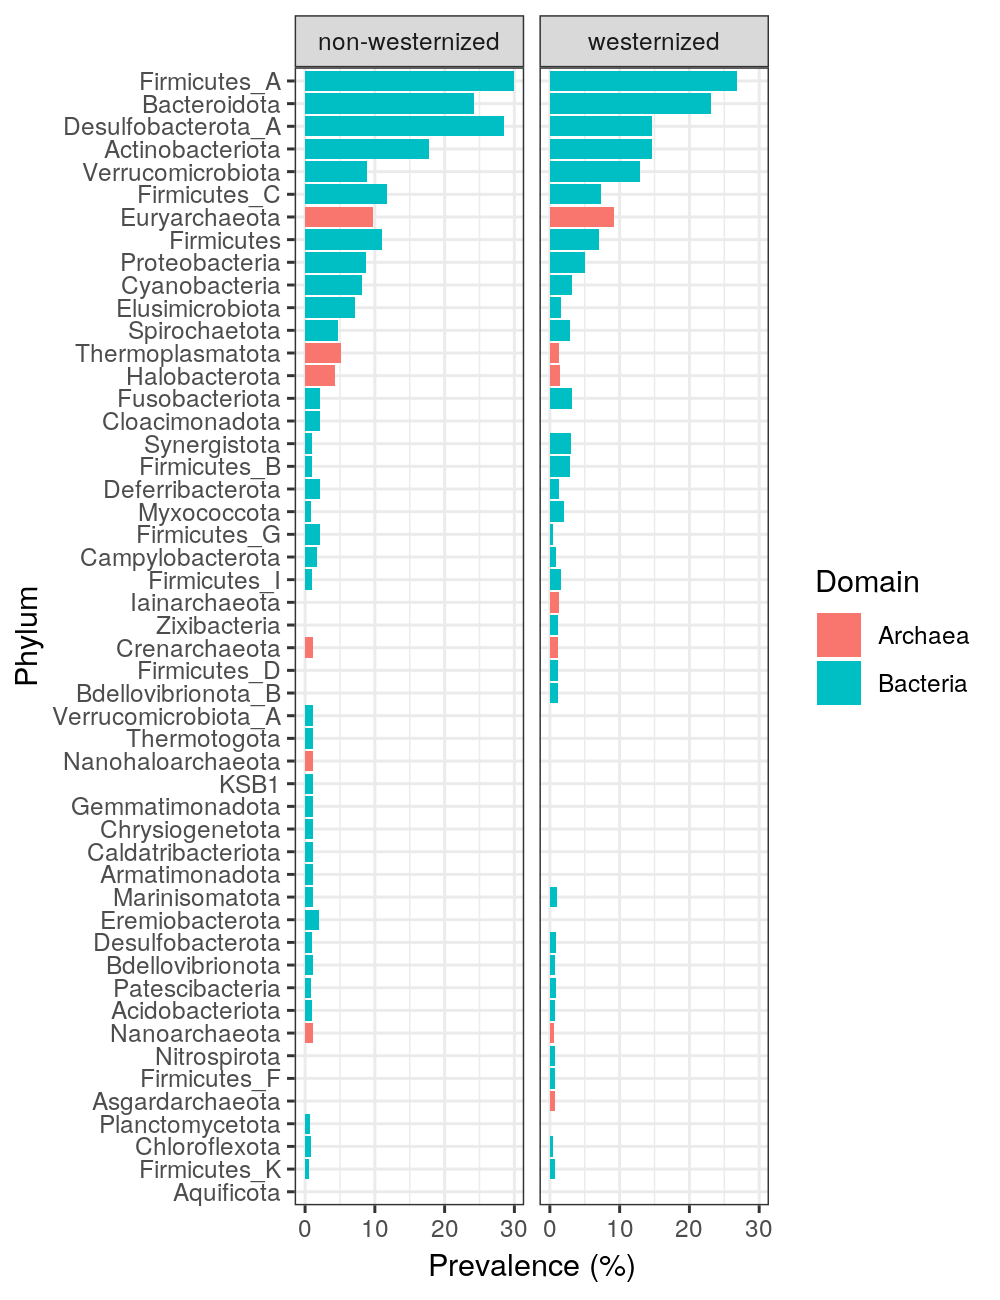

In [44]:
# phylum prevalence
brk_cls_j_s = brk_cls_j %>%
    dt_summarize(prev = sum(Abundance > 1e-5) / length(Abundance) * 100,
                 by=list(Domain, Phylum, westernized))

brk_cls_j_s %>% dt_pull(prev) %>% summary_x

p = brk_cls_j_s %>%
    dt_mutate(westernized = ifelse(westernized, 'westernized', 'non-westernized'),
              Phylum = Phylum %>% reorder(prev)) %>%
    ggplot(aes(Phylum, prev, fill=Domain)) +
    geom_bar(stat='identity') +
    facet_wrap(~ westernized) +
    coord_flip() +
    labs(y='Prevalence (%)') +
    theme_bw() 

p.dims(5,6.5)
plot(p)

# sessionInfo

In [43]:
sessionInfo()

R version 3.6.2 (2019-12-12)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: Ubuntu 18.04.3 LTS

Matrix products: default
BLAS/LAPACK: /ebio/abt3_projects/Georg_animal_feces/envs/tidyverse/lib/libopenblasp-r0.3.7.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] LeyLabRMisc_0.1.3 tidytable_0.3.2   dtplyr_1.0.0      data.table_1.12.8
[5] ggplot2_3.2.1     tidyr_1.0.0       dplyr_0.8.3      

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.3       plyr_1.8.5       pillar_1.4.3     compiler_3.6.2  
 [5] base64enc_0.1-3  tools_3.6